# Problem 1

A major fault in your reservoir has strike N35$^\circ$W and dip 60$^\circ$ from horizontal. $S_{hmin}$ in this area acts along 020$^\circ$, and in situ stresses are $S_{hmin}=70$ MPa, $S_{Hmax}=80$ MPa, $S_v=65$ MPa.   Assume the pore pressure $P_p =30$ MPa. Is the fault likely to slip if the respective frictional coefficient is $\mu=0.7$?

**Solution**

First we'll define some functions that we will use in this problem and the next.

In [1]:
import numpy as np

def compute_Sg(S, angles=(0,0,0)):
    
    alpha, beta, gamma = np.radians(angles)
    
    Rg = np.array([[np.cos(alpha) * np.cos(beta),  
                    np.sin(alpha) * np.cos(beta),  
                    -np.sin(beta)],
                   [np.cos(alpha) * np.sin(beta) * np.sin(gamma) - np.sin(alpha) * np.cos(gamma), 
                    np.sin(alpha) * np.sin(beta) * np.sin(gamma) + np.cos(alpha) * np.cos(gamma),  
                    np.cos(beta) * np.sin(gamma)],
                   [np.cos(alpha) * np.sin(beta) * np.cos(gamma) + np.sin(alpha) * np.sin(gamma), 
                    np.sin(alpha) * np.sin(beta) * np.cos(gamma) - np.cos(alpha) * np.sin(gamma),  
                    np.cos(beta) * np.cos(gamma)]])
                  
    return np.dot(Rg.T, np.dot(S,Rg))

def compute_unit_vectors(strike, dip):
    
    strike = np.radians(strike)
    dip = np.radians(dip)
    
    n = np.array([-np.sin(strike) * np.sin(dip), np.cos(strike) * np.sin(dip), -np.cos(dip) ])
    
    ns = np.array([ np.cos(strike), np.sin(strike), 0 ])
    
    nd = np.array([ -np.sin(strike) * np.cos(dip), np.cos(strike) * np.cos(dip), np.sin(dip) ])
    
    return (n, ns, nd)

def compute_stress_components_on_fault(S, strike, dip, angles=(0,0,0)):

    S_G = compute_Sg(S, angles)
    
    n, ns, nd = compute_unit_vectors(strike, dip)
    
    sigma_n = np.dot(np.dot(S_G, n), n)
    tau_s = np.dot(np.dot(S_G, n), ns)
    tau_d = np.dot(np.dot(S_G, n), nd)
    
    tau_mag = np.sqrt(tau_s ** 2. + tau_d ** 2.)
    
    return (sigma_n, tau_s, tau_d, tau_mag)


def check_fault_slip(S, Pp, strike, dip, angles=(0,0,0), mu=0.6):
    
    sigma_n, tau_s, tau_d, tau_mag = compute_stress_components_on_fault(S, strike, dip, angles)
    
    return (tau_mag / (sigma_n - Pp) > mu)

Now we can check to see if our fault is slipping under the given conditions from the functions above.

In [2]:
S = np.diag([80, 70, 65])

check_fault_slip(S, 30, -35, 60, angles=(-70,0,0), mu=0.7)

False

# Problem 2

Assuming the same reservior conditions as Problem 1, write a computer code that can compute the resolved shear stress magnitude and normal effective stress on a fault characterized by the strike direction and dip angle.  Now randomly generate 10000 faults (use a statistical distribution to choose random pairs of strike and dip) and plot the results on a Mohr diagram (i.e. shear stress as a function of normal stress).  Where do near vertical strike-slip faults appear on this diagram? Where do the oblique-slip faults fall?

**Solution**

The code below creates the random faults.  We will assume that a near-vertical strike-slip fault is one in which the dip angle is greater than $85^\circ$.  Oblique-slip faults are those that have near-equal magnitudes of shear and dip components of shear stresses.

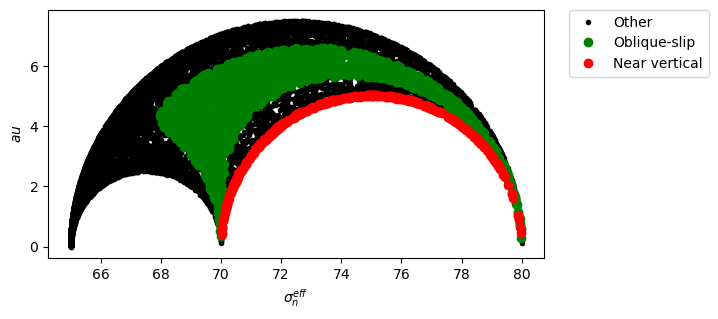

In [3]:
import matplotlib.pyplot as plt

def create_plot(S, angles=(0,0,0)):

    strikes = np.random.rand(10000) * 360
    dips =  np.random.rand(10000) * 90

    out = np.array([ compute_stress_components_on_fault(S, strikes[i], dips[i], angles) for i in range(len(strikes)) ])

    normal = out[:,0]
    shear_slip = out[:,1]
    shear_dip = out[:,2]
    shear_mag = out[:,3]


    vert_ss = np.logical_and(dips > 85, np.abs(shear_slip / shear_dip) > 5)
    oblique_slip = np.logical_and(0.75 < np.abs(shear_slip / shear_dip), np.abs(shear_slip / shear_dip) < 1.5)
    other = np.logical_not(np.logical_or(vert_ss, oblique_slip))

    plt.figure()
    plt.gca().set_aspect('equal')
    plt.plot(normal[other], shear_mag[other], 'k.',
             normal[oblique_slip], shear_mag[oblique_slip], 'go',
             normal[vert_ss], shear_mag[vert_ss], 'ro'),
    plt.xlabel('$\sigma_n^{eff}$')
    plt.ylabel('${\tau}$');
    plt.legend(['Other','Oblique-slip', 'Near vertical'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    
    
create_plot(S, angles=(-70,0,0))

# Problem 3

Repeat Problem 2 but make $S_{hmin}=S_{Hmax}=45$ MPa (i.e. stress isotropic in the horizontal plane. How has the Mohr diagram changed? Is this still a 3D problem?

**Solution**

We can use our code above to quickly solve this problem by simply plugging in the new numbers.

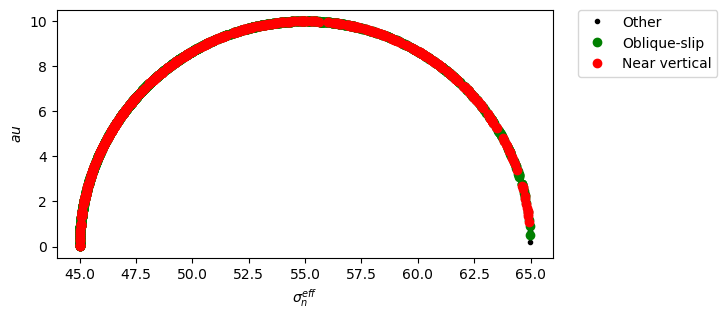

In [4]:
S = np.diag([65, 45, 45])
create_plot(S, angles=(-70,0,0))

This problem is clearly 2D as it can be fully characterized by the two principle stresses.